<a href="https://colab.research.google.com/github/harlock-42/pro_piscine_AI/blob/main/Advanced00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 0_and_1.csv to 0_and_1 (1).csv


In [ ]:
# import required libraries
import numpy as np
import sys
import matplotlib.pyplot as plt
import math
np.random.seed(42)

In [ ]:
data = np.genfromtxt("0_and_1.csv", delimiter=',', skip_header=1)

# Extract the target variable Y and reshape it
Y = data[:, :1]
# Remove the label column from X and transpose the matrix
X = data[:, 1:]


maybe I need to transpose Y and X

In [ ]:
# Print the shape of Y and X
print("X", X.shape)
print("Y", Y.shape)

X (8816, 784)
Y (8816, 1)


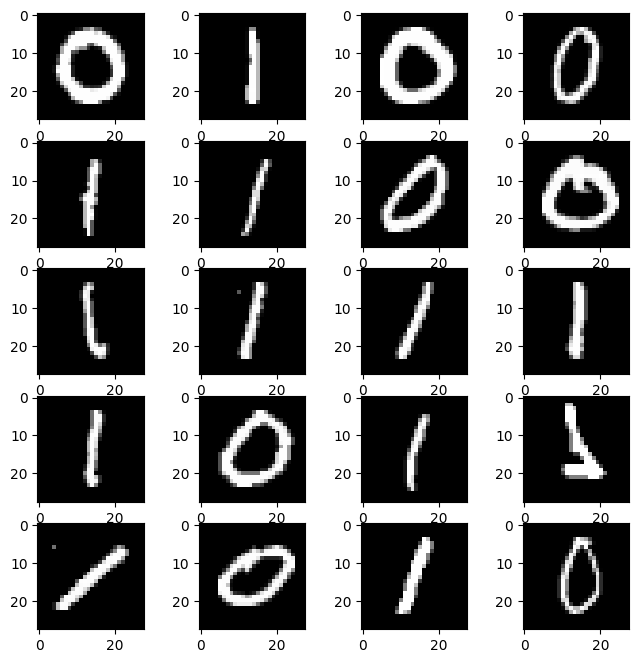

In [ ]:
# Create a figure to plot the images
fig = plt.figure(figsize=(8, 8))
columns = 4
rows = 5

# Loop through and display each image
for i in range(1, columns * rows + 1):
    X1 = X[i]  # Extract the i-th column (i-th image)
    X1 = X1.reshape(28, 28)  # Reshape the flattened image to (28, 28)
    fig.add_subplot(rows, columns, i)  # Add a subplot to the figure
    plt.imshow(X1, cmap='gray')  # Display the image using a grayscale colormap

# Show the plot
plt.show()

In [ ]:
import numpy as np

def sigmoid(x, derivative=False):
    """
    Compute the sigmoid function or its derivative.

    :param x: Input value or array.
    :param derivative: If True, compute the derivative of the sigmoid function.
    :return: Sigmoid function or its derivative.
    """
    o = 1 / (1 + np.exp(-x))
    if derivative:
      return o * (1 - o)
    return o

In [ ]:
print(sigmoid(0))                   # Output: 0.5
print(sigmoid(0, derivative=True))  # Output: 0.25

0.5
0.25


In [ ]:
def network_architecture(X, Y):
    # Number of nodes in the input layer
    n_x = X.shape[1]
    # Number of nodes in the hidden layer
    n_h = 10
    # Number of nodes in the output layer
    n_y = Y.shape[1]
    return (n_x, n_h, n_y)

# Get the network architecture dimensions
n_x, n_h, n_y = network_architecture(X, Y)

# Print the number of nodes in each layer
print("Number of nodes in input layer (n_x):", n_x)
print("Number of nodes in hidden layer (n_h):", n_h)
print("Number of nodes in output layer (n_y):", n_y)

Number of nodes in input layer (n_x): 784
Number of nodes in hidden layer (n_h): 10
Number of nodes in output layer (n_y): 1


In [ ]:
def define_network_parameters(n_x, n_h, n_y):
    # Initialize weights and biases for the first layer
    W1 = np.random.randn(n_h, n_x) * 0.01  # Random initialization with small values
    b1 = np.zeros((n_h, 1))  # Initialize biases with zeros

    # Initialize weights and biases for the second layer
    W2 = np.random.randn(n_y, n_h)          # Random initialization with small values
    b2 = np.zeros((n_y, 1))  # Initialize biases with zeros

    # Store the parameters in a dictionary
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}

    return parameters

In [ ]:
# Get the neural network architecture dimensions
n_x, n_h, n_y = network_architecture(X, Y)
# Define the network parameters using the obtained dimensions
params = define_network_parameters(n_x, n_h, n_y)

In [ ]:
# Recall that Z = W*X + b & A = g(Z)

# Define the forward propagation function
def forward_propagation(X, params):
    # Calculate the weighted sum and apply activation function for the first layer

    Z1 = params['W1'] @ X.transpose() + params['b1']
    A1 = sigmoid(Z1)

    # Calculate the weighted sum and apply activation function for the second layer
    Z2 = params['W2'] @ A1 + params['b2']
    A2 = sigmoid(Z2)

    # Return the calculated intermediate results
    return {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}

In [ ]:
# Perform forward propagation
refor = forward_propagation(X, params)

# Print the shapes of the intermediate variables
print("Z1", refor['Z1'].shape)
print("A1", refor['A1'].shape)
print("Z2", refor['Z2'].shape)
print("A2", refor['A2'].shape)

Z1 (10, 8816)
A1 (10, 8816)
Z2 (1, 8816)
A2 (1, 8816)


In [ ]:
def backward_propagation(params, activations, X, Y):
    """
    Compute the derivatives of the loss with respect to the parameters using backpropagation.

    :param params: Dictionary containing the current parameters.
    :param activations: Dictionary containing the intermediate activations during forward propagation.
    :param X: Input data.
    :param Y: True labels.
    :return: Dictionary containing the derivatives of the loss with respect to the parameters.
    """
    m = X.shape[1]  # Number of training examples

    # Substract real result (Y) to hidden layer prediction (A2)
    dZ2 = activations['A2'] - Y.transpose()
    dW2 = (1 / m) * (dZ2 @ activations['A1'].transpose())
    db2 = (1 / m) * sum(dZ2[0])
    # Hidden layers
    dZ1 = (params['W2'].transpose() * dZ2) * sigmoid(activations['Z1'], derivative=True)
    dW1 = (1 / m) * (dZ1 @ X)
    a = dZ1.sum(axis=1, keepdims=True)
    db1 = (1 / m) * dZ1.sum(axis=1, keepdims=True)
    return {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}


def update_parameters(params, derivatives, alpha=0.1):
    """
    Update the parameters using gradient descent.

    :param params: Dictionary containing the current parameters.
    :param derivatives: Dictionary containing the derivatives of the loss with respect to the parameters.
    :param alpha: Learning rate.
    :return: Updated parameters.
    """
    params['W1'] = params['W1'] - alpha * derivatives['dW1']
    params['b1'] = params['b1'] - alpha * derivatives['db1']
    params['W2'] = params['W2'] - alpha * derivatives['dW2']
    params['b2'] = params['b2'] - alpha * derivatives['db2']
    return params

In [ ]:
# Update the parameters using gradient descent and print the updated parameters

# Calculate the derivatives using backward propagation
derivatives = backward_propagation(params, refor, X, Y)

# Update the parameters using the derivatives and learning rate
params = update_parameters(params, derivatives)

# Print the updated parameters
print(params)

{'W1': array([[ 4.96714153e-03, -1.38264301e-03,  6.47688538e-03,
         1.52302986e-02, -2.34153375e-03, -2.34136957e-03,
         1.57921282e-02,  7.67434729e-03, -4.69474386e-03,
         5.42560044e-03, -4.63417693e-03, -4.65729754e-03,
         2.41962272e-03, -1.91328024e-02, -1.72491783e-02,
        -5.62287529e-03, -1.01283112e-02,  3.14247333e-03,
        -9.08024076e-03, -1.41230370e-02,  1.46564877e-02,
        -2.25776300e-03,  6.75282047e-04, -1.42474819e-02,
        -5.44382725e-03,  1.10922590e-03, -1.15099358e-02,
         3.75698018e-03, -6.00638690e-03, -2.91693750e-03,
        -6.01706612e-03,  1.85227818e-02, -1.34972247e-04,
        -1.05771093e-02,  8.22544912e-03, -1.22084365e-02,
         2.08863595e-03, -1.95967012e-02, -1.32818605e-02,
         1.96861236e-03,  7.38466580e-03,  1.71368281e-03,
        -1.15970690e-03, -3.01492121e-03, -1.47858033e-02,
        -7.19844208e-03, -4.60638771e-03,  1.05712223e-02,
         3.43618290e-03, -1.76304016e-02,  3.2408

In [ ]:
def compute_error(Predicted, Actual):
    """
    Compute the mean squared error between predicted values and actual values.

    :param Predicted: Predicted values.
    :param Actual: Actual values.
    :return: Mean squared error.
    """
    return np.mean((Predicted - Actual) ** 2)


In [ ]:
def neural_network(X, Y, num_iterations=10):
    """
    Train a neural network model using gradient descent.

    :param X: Input data.
    :param Y: Target data.
    :param num_iterations: Number of iterations for training.
    :return: Trained parameters and cost history.
    """
    coast_history = np.array([])
    # define network neural architecture
    n_x, n_h, n_y = network_architecture(X, Y)
    # initialize starting values for weight et biais
    params = define_network_parameters(n_x, n_h, n_y)

    for _ in range(num_iterations):
      # Prediction
      refor = forward_propagation(X, params)
      # Coast
      error = compute_error(refor['A2'], Y.transpose())
      coast_history = np.append(coast_history, error)
      # Backward propagation. Apply error to bias and weight of each layer
      derivatives = backward_propagation(params, refor, X, Y)
      params = update_parameters(params, derivatives, alpha=0.001)

    return params, coast_history


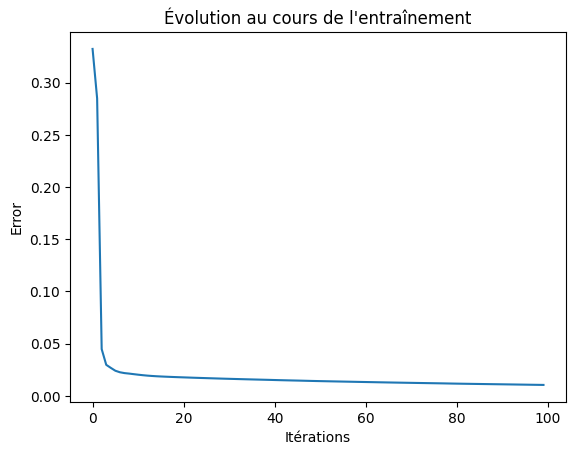

In [ ]:
# Train the neural network model and retrieve the trained parameters and cost history
model, cost = neural_network(X, Y, num_iterations=100)
# print(cost)
# Plot the cost history
plt.plot(cost)
plt.xlabel("Itérations")
plt.ylabel("Error")
plt.title("Évolution au cours de l'entraînement")
plt.show()

In [ ]:
def predict(parameters, X):
    # Perform forward propagation to get the results
    results = forward_propagation(X, parameters)

    # Round the predictions to 0 or 1
    predictions = np.around(results['A2'])

    return predictions

# Make predictions using the trained model
predictions = predict(model, X)

In [ ]:
# Initialize an empty list to store the indices of misclassified examples
Error = []

for i, (real, pred) in enumerate(zip(Y.flatten(), predictions.flatten())):
  if real != pred:
    Error.append(i)


print(predictions.shape, Y.shape)

# Print the indices of misclassified examples
print("Indices of misclassified examples:", Error)

# Calculate the accuracy by subtracting the ratio of misclassified examples from 1 and multiplying by 100
accuracy = ((X.shape[0] - len(Error)) / X.shape[0]) * 100

# Print the accuracy as a percentage
print("Accuracy: {:f}%".format(accuracy))

(1, 8816) (8816, 1)
Indices of misclassified examples: [332, 1307, 2699, 4749, 5253, 6224, 7653, 8144, 8199, 8215, 8552]
Accuracy: 99.875227%


0
1
2
3
4
5
6
7
8
9
10


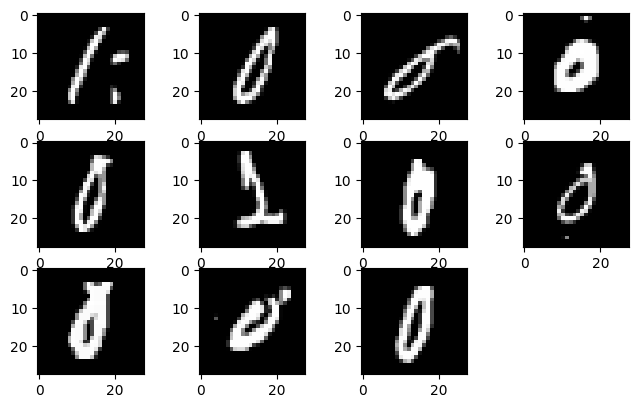

In [ ]:
#Display misclassified images
fig = plt.figure(figsize=(8, 8))
columns = 4
rows = 5

# Loop through and display each image
for i, idx in enumerate(Error):
  X1 = X[idx]  # Extract the i-th column (i-th image)
  X1 = X1.reshape(28, 28)  # Reshape the flattened image to (28, 28)
  print(i)
  fig.add_subplot(rows, columns, i+1)  # Add a subplot to the figure
  plt.imshow(X1, cmap='gray')  # Display the image using a grayscale colormap

# Show the plot
plt.show()